# Статистические тесты в контексте EDA

> Для корректной работы ссылок оглавления лучше смотреть проект здесь \
> https://nbviewer.org/github/experiment0/sf_data_science/blob/main/project_3/statistical_tests.ipynb?flush_cache=true

## Оглавление
- [1. Постановка задачи](#item_1)
    - [1.1. Описание столбцов](#item_1_1)
- [2. Загрузка данных](#item_2)
- [3. Предварительное исследование и корректировка данных](#item_3)
    - [3.1. Удаление неинформативных признаков](#item_3_1)
    - [3.2. Проверка на пропуски и дубликаты](#item_3_2)
    - [3.3. Проверка типов столбцов](#item_3_3)
    - [3.4. Подготовка данных для дальнейшего использования](#item_3_4)
- [4. Рассмотрим распределение данных в целом](#item_4)
    - [4.1. Зарплата](#item_4_1)
    - [4.2. Год](#item_4_2)
    - [4.3. Опыт работы](#item_4_3)
    - [4.4. Тип трудоустройства](#item_4_4)
    - [4.5. Название должности](#item_4_5)
    - [4.6. Страна проживания сотрудника](#item_4_6)
    - [4.7. Объем удаленной работы](#item_4_7)
    - [4.8. Страна офиса работодателя](#item_4_8)
    - [4.9. Размер компании](#item_4_9)
- [5. Исследование влияния признаков на размер зарплаты](#item_5)
    - [5.1. Зарплата в зависимости от года](#item_5_1)
    - [5.2. Зарплата в зависимости от опыта работы](#item_5_2)
    - [5.3. Зарплата в зависимости от типа трудоустройства](#item_5_3)
    - [5.4. Зарплата в зависимости от должности](#item_5_4)
    - [5.5. Зарплата в зависимости от страны проживания сотрудника](#item_5_5)
    - [5.6. Зарплата в зависимости от формата работы](#item_5_6)
    - [5.7. Зарплата в зависимости от страны офиса работодателя](#item_5_7)
    - [5.8. Зарплата в зависимости от размера компании](#item_5_8)
    - [5.9. Предварительный вывод о влиянии признаков на заработную плату](#item_5_9)
- [6. Предварительное исследование по остальным вопросам HR-агентства](#item_6)
    - [6.1. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?](#item_6_1)
    - [6.2. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?](#item_6_2)
- [7. Статистический анализ влияния признаков на размер зарплаты](#item_7)
    - [7.1. Зависит ли заработная плата от года?](#item_7_1)
    - [7.2. Зависит ли заработная плата от опыта работы?](#item_7_2)
    - [7.3. Зависит ли заработная плата от типа трудоустройства?](#item_7_3)
    - [7.4. Зависит ли заработная плата от должности?](#item_7_4)
    - [7.5. Зависит ли заработная плата от страны проживания сотрудника?](#item_7_5)
    - [7.6. Зависит ли заработная плата от формата работы?](#item_7_6)
    - [7.7. Зависит ли заработная плата от страны офиса работодателя?](#item_7_7)
    - [7.8. Зависит ли заработная плата от размера компании?](#item_7_8)
    - [7.9. Итоговый вывод о влиянии признаков на заработную плату](#item_7_9)
- [8. Статистический анализ по другим вопросам HR-агентства](#item_8)
    - [8.1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?](#item_8_1)
    - [8.2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?](#item_8_2)
    - [8.3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?](#item_8_3)
    - [8.4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?](#item_8_4)
- [9. Итоговый вывод](#item_9)

## 1. Постановка задачи <a class="anchor" id="item_1"></a>

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. А также ответить на ключевые вопросы HR-агентства:
    - Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
    - Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
    - Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
    - Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

### 1.1. Описание столбцов <a class="anchor" id="item_1_1"></a>
- `work_year` - Год, в котором была выплачена зарплата.
- `experience_level` - Опыт работы на этой должности в течение года со следующими возможными значениями: 
    - *EN* — Entry-level/Junior;
    - *MI* — Mid-level/Intermediate;
    - *SE* — Senior-level/Expert;
    - *EX* — Executive-level/Director.
- `employment_type` - Тип трудоустройства для этой роли:
    - *PT* — неполный рабочий день;
    - *FT* — полный рабочий день;
    - *CT* — контракт;
    - *FL* — фриланс.
- `job_title` - Роль, в которой соискатель работал в течение года.
- `salary` - Общая выплаченная валовая сумма заработной платы.
- `salary_currency` - Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
- `salary_in_usd` - Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
- `employee_residence` - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
- `remote_ratio` - Общий объём работы, выполняемой удалённо. Возможные значения:
    - 0 — удалённой работы нет (менее 20 %);
    - 50 — частично удалённая работа;
    - 100 — полностью удалённая работа (более 80 %).
- `company_location` - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
- `company_size` - Среднее количество людей, работавших в компании в течение года:
    - *S* — менее 50 сотрудников (небольшая компания);
    - *M* — от 50 до 250 сотрудников (средняя компания);
    - *L* — более 250 сотрудников (крупная компания).

## 2. Загрузка данных <a class="anchor" id="item_2"></a>

In [1]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2")

# загружаем данные
data_salaries = pd.read_csv('./data/ds_salaries.csv', index_col=0)
data_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## 3. Предварительное исследование и корректировка данных <a class="anchor" id="item_3"></a>

### 3.1. Удаление неинформативных признаков <a class="anchor" id="item_3_1"></a>

Неинформативными представляются признаки 
- `salary` - Общая выплаченная валовая сумма заработной платы.
- `salary_currency` - Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.

Потому что на их основе уже был посчитан признак 
- `salary_in_usd` - Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).

Удалим признаки `salary` и `salary_currency`.

In [91]:
data_salaries.drop(['salary', 'salary_currency'], axis=1 , inplace=True)

### 3.2. Проверка на пропуски и дубликаты <a class="anchor" id="item_3_2"></a>

Посмотрим информацию по столбцам

In [92]:
data_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 47.4+ KB


- В датасете 607 записей.
- Пропущенных значений нет.

Проверим данные на наличие полных дубликатов.

In [93]:
print('Количество дубликатов: {}'.format(data_salaries[data_salaries.duplicated()].shape[0]))

Количество дубликатов: 42


Удалим дубликаты

In [94]:
dupl_columns = list(data_salaries.columns)

data_salaries = data_salaries.drop_duplicates(subset=dupl_columns)

print(f'Результирующее число записей: {data_salaries.shape[0]}')

Результирующее число записей: 565


### 3.3. Проверка типов столбцов <a class="anchor" id="item_3_3"></a>

Посмотрим на количество уникальных значений в каждом стобце.

In [95]:
data_salaries.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

**Числовым** является только признак `salary_in_usd`. \
Остальные признаки являются **категориальными**.

**Заменим значения в столбце `remote_ratio` на строковые**

- **0** — удалённой работы нет (менее 20 %) - заменим на **NOT**;
- **50** — частично удалённая работа - заменим на **HALF**;
- **100** — полностью удалённая работа (более 80 %) - заменим на **FULL**.

In [96]:
"""Возвращает строковое значение для столца remote_ratio
value: int - значение из столбца
"""
def get_remote_ratio_str_name(value):
    if (value == '0'):
        return 'NOT'
    elif (value == '50'):
        return 'HALF'
    return 'FULL'

data_salaries['remote_ratio'] = data_salaries['remote_ratio'].astype('str')
data_salaries['remote_ratio'] = data_salaries['remote_ratio'].apply(get_remote_ratio_str_name)

Выведем получившуюся таблицу.

In [97]:
data_salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,NOT,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,NOT,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,HALF,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,NOT,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,HALF,US,L


### 3.4. Подготовка данных для дальнейшего использования <a class="anchor" id="item_3_4"></a>

Отфильтруем строки с должностью "Data Scientist".

In [98]:
# Маска по названию должности
job_title_mask = data_salaries['job_title'] == 'Data Scientist'

# Отфильтруем строки только с должностью 'Data Scientist' для дальнейшего использования
data_ds_salaries = data_salaries[job_title_mask]

print(f'Таблица содержит {data_ds_salaries.shape[0]} записей с должностью Data Scientist.')

Таблица содержит 130 записей с должностью Data Scientist.


## 4. Рассмотрим распределение данных в целом <a class="anchor" id="item_4"></a>

In [99]:
# Функции для дальнейшего использования


"""Выводит основные характерстики распределения в виде таблицы
series_data: Series - столбец с данными
title: str - название таблицы
return: void
"""
def show_describe_table(series_data, title):
    data_agg = series_data.describe().round(2).to_frame()
    data_agg.columns = [title]
    display(data_agg)
    

"""Выводит круговую диаграмму с распределением переданной величины и значения величин
series_data: Series - столбец с данными
title: str - название графика
max_values_count: int - количество самых часто встречающихся значений, которые включаются в график
return: void
"""
def show_pie_and_values(series_data, title, max_values_count=0):
    # Данные, которые будем выводить на графике
    series_to_display = series_data.value_counts().sort_values(ascending=False)
    
    # Если передан лимит на количество значений, которые включаем в график,
    # то выводим только первые max_values_count наиболее часто встречающихся,
    # Остальные заменяем на 'Others'
    if (max_values_count):
        # Series с наиболее часто встречающимися значениями
        greatest_values = series_data\
        .value_counts()\
        .sort_values(ascending=False)\
        .head(max_values_count).index

        # Список с наиболее часто встречающимися значениями
        greatest_values_list = list(greatest_values)

        """Возвращает название для графика
        source_value: str - название из таблицы
        """
        def get_value_for_pie(source_value):
            if (source_value in greatest_values_list):
                return source_value
            return 'Others'

        # Series с данными для графика
        series_to_display = series_data\
        .apply(get_value_for_pie).value_counts().sort_values(ascending=False)

    # Определяем параметры для построения графика
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_axes((1, 1, 1, 1))
    pie = ax.pie(
        series_to_display,
        labels=series_to_display.index,
        autopct='%1.1f%%',
        startangle=90
    )
    ax.set_title(title, fontsize=16)
    plt.show(pie)
    
    # Выведем также численные значения величин
    frame_to_display = series_to_display.to_frame()
    frame_to_display.columns = ['Численные значения величин']
    display(frame_to_display)
    
    print(f'Всего уникальных значений: {series_data.nunique()}')


"""Выводит гистограмму и коробчатую диаграмму распределения числового признака
data_column: Series - столбец с данными, по которым строим графики
title: str - Заголовок графика
xlabel: str - Заголовок по оси X
ylabel: str - Заголовок по оси Y
return: void
"""
def show_hist_and_box(data_column, title, xlabel, ylabel):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    sns.histplot(data=data_column, kde=True, ax=axes[0])
    axes[0].set(xlabel=xlabel, ylabel=ylabel)
    axes[0].set_title(title)
    axes[0].axvline(
        data_column.mean(), 
        color='red', 
        linestyle='--', 
        linewidth=0.8
        )

    sns.boxplot(
        data=data_column, 
        ax=axes[1], 
        orient='h', 
        medianprops={"color": "red", "linestyle": '--'}
        )
    axes[1].set(xlabel=xlabel)
    axes[1].set_title(title)

    plt.show()

### 4.1. Зарплата <a class="anchor" id="item_4_1"></a>

Напомним описание содержимого столбца:

- `salary_in_usd` - Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).

#### Распределение для всех должностей

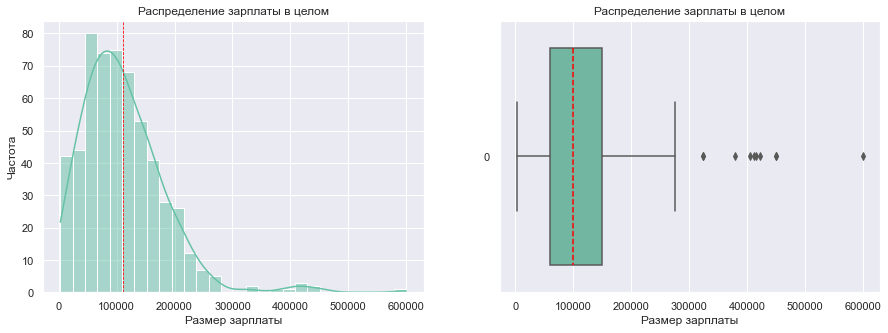

In [100]:
show_hist_and_box(
    data_column=data_salaries['salary_in_usd'], 
    title='Распределение зарплаты в целом', 
    xlabel='Размер зарплаты', 
    ylabel='Частота'
    )

In [101]:
show_describe_table(data_salaries['salary_in_usd'], 'Основные характеристики распределения зарплаты')

,Основные характеристики распределения зарплаты
count,565.00
mean,110610.34
std,72280.70
min,2859.00
25%,60757.00
50%,100000.00
75%,150000.00
max,600000.00


> Распределение зарплаты для всех должностей отлично от нормального, имеются выбросы.

#### Распределение для должности Data Scientist

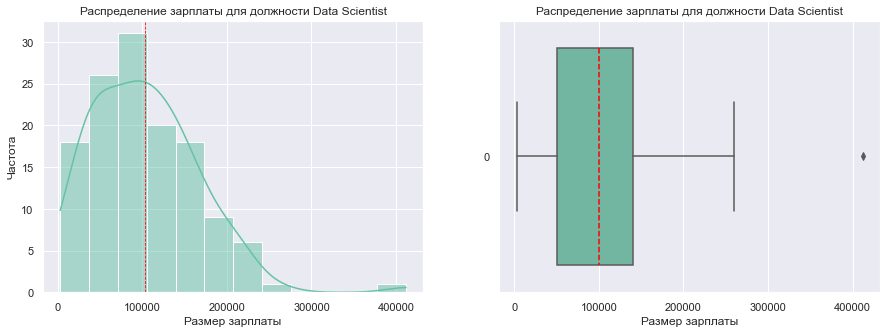

In [102]:
show_hist_and_box(
    data_column=data_ds_salaries['salary_in_usd'], 
    title='Распределение зарплаты для должности Data Scientist', 
    xlabel='Размер зарплаты', 
    ylabel='Частота'
    )

In [103]:
show_describe_table(
    data_ds_salaries['salary_in_usd'], 
    'Основные характеристики распределения зарплаты для должности Data Scientist'
    )

,Основные характеристики распределения зарплаты для должности Data Scientist
count,130.00
mean,103336.35
std,63967.56
min,2859.00
25%,50330.25
50%,100000.00
75%,140400.00
max,412000.00


> Распределение зарплаты для должности Data Scientist также отлично от нормального.

### 4.2. Год <a class="anchor" id="item_4_2"></a>

Напомним описание содержимого столбца

- `work_year` - Год, в котором была выплачена зарплата.

Посмотрим, сколько записей зафиксировано для каждого года.

In [104]:
data_salaries['work_year'].value_counts()

2022    278
2021    215
2020     72
Name: work_year, dtype: int64

Для каждого последующего года количество данных больше, чем для предыдущего.

### 4.3. Опыт работы <a class="anchor" id="item_4_3"></a>

Напомним описание содержимого столбца:

- `experience_level` - Опыт работы на этой должности в течение года со следующими возможными значениями: 
    - *EN* — Entry-level/Junior;
    - *MI* — Mid-level/Intermediate;
    - *SE* — Senior-level/Expert;
    - *EX* — Executive-level/Director.

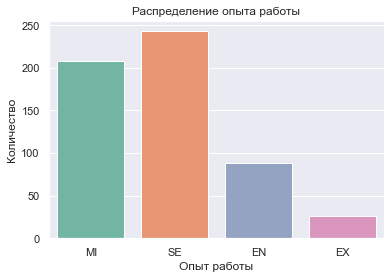

In [105]:
ax = sns.countplot(data=data_salaries, x=data_salaries['experience_level'])
ax.set(xlabel='Опыт работы', ylabel='Количество')
plt.title('Распределение опыта работы')
plt.show()

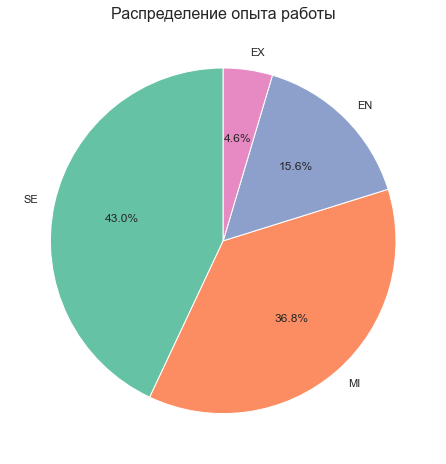

,Численные значения величин
SE,243
MI,208
EN,88
EX,26


Всего уникальных значений: 4


In [106]:
show_pie_and_values(series_data=data_salaries['experience_level'], title='Распределение опыта работы')

Наиболее часто встречается уровень серьора: **Senior-level/Expert** 43% (243 строки).\
Меньше всего директор: **Senior-level/Expert** 4,6% (26 строк).

### 4.4. Тип трудоустройства <a class="anchor" id="item_4_4"></a>

Напомним обозначение данных в столбце.

- `employment_type` - Тип трудоустройства для этой роли:
    - *PT* — неполный рабочий день;
    - *FT* — полный рабочий день;
    - *CT* — контракт;
    - *FL* — фриланс.

Посмотрим на точные значения.

In [107]:
data_salaries['employment_type'].value_counts()

FT    546
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

Большинство значение занимает **FT** — полный рабочий день.\
Других вариантов так мало, что на графике их просто не будет видно.\
Поэтому целесообразнее ограничиться просто цифрами.

### 4.5. Название должности <a class="anchor" id="item_4_5"></a>

Напомним описание содержимого столбца:

- `job_title` - Роль, в которой соискатель работал в течение года.

Рассмотрим 5 наиболее часто встречающихся значений.

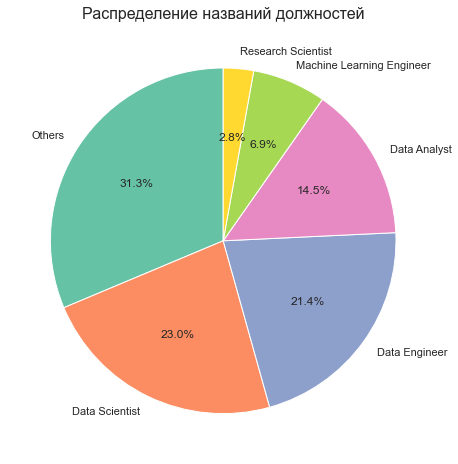

,Численные значения величин
Others,177
Data Scientist,130
Data Engineer,121
Data Analyst,82
Machine Learning Engineer,39
Research Scientist,16


Всего уникальных значений: 50


In [108]:
show_pie_and_values(
    series_data=data_salaries['job_title'], 
    title='Распределение названий должностей', 
    max_values_count=5
    )

Наиболее часто встречаются названия **Data Scientist** и  **Data Engineer**.

### 4.6. Страна проживания сотрудника <a class="anchor" id="item_4_6"></a>

Напомним описание содержимого столбца:

- `employee_residence` - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

Рассмотрим 6 наиболее часто встречающихся значений.

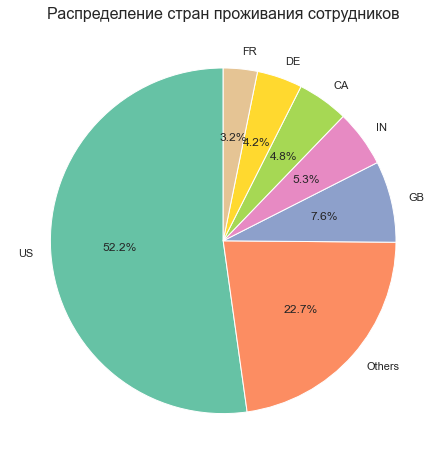

,Численные значения величин
US,295
Others,128
GB,43
IN,30
CA,27
DE,24
FR,18


Всего уникальных значений: 57


In [109]:
show_pie_and_values(
    series_data=data_salaries['employee_residence'], 
    title='Распределение стран проживания сотрудников', 
    max_values_count=6
    )

Наибольшее количество сотрудников проживает в **США (Unated State)**.

### 4.7. Объем удаленной работы <a class="anchor" id="item_4_7"></a>

Напомним описание содержимого столбца:

- `remote_ratio` - Общий объём работы, выполняемой удалённо. Возможные значения:
    - *NOT* — удалённой работы нет (менее 20 %);
    - *HALF* — частично удалённая работа;
    - *FULL* — полностью удалённая работа (более 80 %).

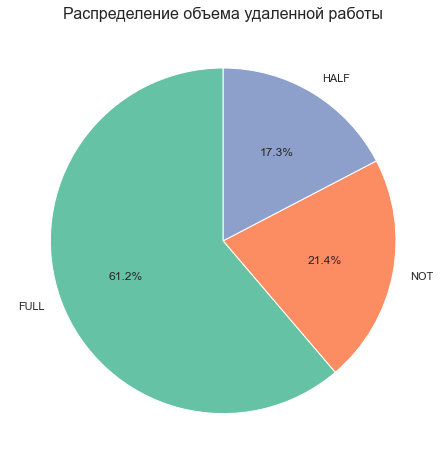

,Численные значения величин
FULL,346
NOT,121
HALF,98


Всего уникальных значений: 3


In [110]:
show_pie_and_values(
    series_data=data_salaries['remote_ratio'], 
    title='Распределение объема удаленной работы'
    )

Сотрудники работали преимущественно удаленно.

### 4.8. Страна офиса работодателя <a class="anchor" id="item_4_8"></a>

Напомним описание содержимого столбца:

- `company_location` - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.

Рассмотрим 6 наиболее часто встречающихся значений.

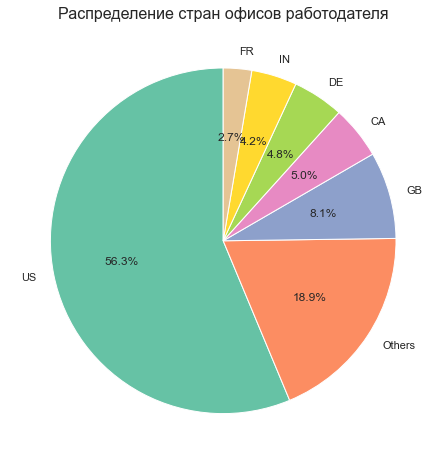

,Численные значения величин
US,318
Others,107
GB,46
CA,28
DE,27
IN,24
FR,15


Всего уникальных значений: 50


In [111]:
show_pie_and_values(
    series_data=data_salaries['company_location'], 
    title='Распределение стран офисов работодателя',
    max_values_count=6,
    )

Наибольшее количество офисов работодателей находится **США (Unated State)**.

### 4.9. Размер компании <a class="anchor" id="item_4_9"></a>

Напомним описание содержимого столбца:

- `company_size` - Среднее количество людей, работавших в компании в течение года:
    - *S* — менее 50 сотрудников (небольшая компания);
    - *M* — от 50 до 250 сотрудников (средняя компания);
    - *L* — более 250 сотрудников (крупная компания).

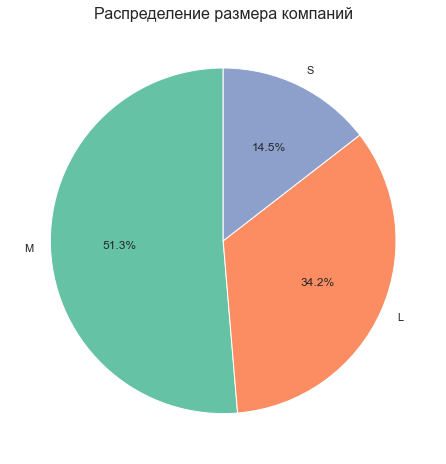

,Численные значения величин
M,290
L,193
S,82


Всего уникальных значений: 3


In [112]:
show_pie_and_values(
    series_data=data_salaries['company_size'], 
    title='Распределение размера компаний',
    )

Больше всего средних компаний.

## 5. Исследование влияния признаков на размер зарплаты <a class="anchor" id="item_5"></a>

In [113]:
# Функции для дальнейшего использования


"""Возвращает данные с наиболее часто встречающимися значениями
data: DataFrame - таблица с данными
column_name: str - имя колонки, в которой будем искать наиболее часто встречающимися значения
values_count: int - сколько наиболее часто повторяющихся значений будем рассматривать
return: DataFrame - таблица с отфильтрованными данными
"""
def get_data_with_most_frequent_values(data, column_name, values_count):
    # Список из наиболее часто встречающихся значений
    most_frequent_values_list =\
    list(data[column_name].value_counts().sort_values(ascending=False).head(values_count).index)
    # Маска с условием, что значение находится в найденном списке
    mask = data[column_name].isin(most_frequent_values_list)
    # Возвращаем строки, отобранные по маске
    return data[mask]


"""Выводит сравнительные графики boxplot и значения describe для заданных столбцов
data: DataFrame - таблица с данными
numeric_column: str - имя колонки с числовым значением
category_column: str - имя колонки с категориальным значением
numeric_title: str - подпись к колонке с числовым значением
category_title: str - подпись к колонке с категориальным значением
boxplots_title: str - подпись к графикам boxplot
describe_title: str - подпись к таблице со значениями describe
return: void
"""
def show_comparative_boxplots_and_describe(data, 
                                           numeric_column, category_column, 
                                           numeric_title, category_title,
                                           boxplots_title, describe_title):
    # Задаем параметры для графиков boxplot
    fig = plt.figure(figsize=(12, 6))
    ax = sns.boxplot(
        data=data, 
        x=numeric_column, 
        y=category_column, 
        orient='h', 
        medianprops={"color": "red", "linestyle": '--'}
        )
    ax.set(xlabel=numeric_title, ylabel=category_title)
    plt.title(boxplots_title, fontsize=16)
    plt.show()
    
    # Выводим данные describe
    data_agg = data.groupby(category_column)[numeric_column].describe().round(2)
    print(describe_title)
    display(data_agg)

### 5.1. Зарплата в зависимости от года <a class="anchor" id="item_5_1"></a>

Напомним описание содержимого столбца

- `work_year` - Год, в котором была выплачена зарплата.

#### Для всех должностей

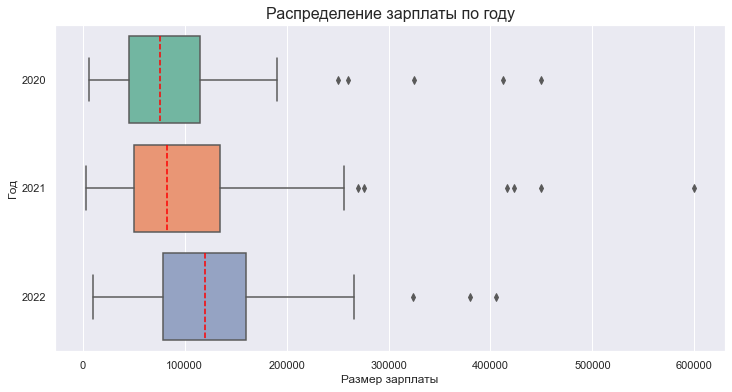

Зарплата в зависимости от года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.00,82831.80,5707.0,45724.5,75544.0,115526.0,450000.0
2021,215.0,99430.41,80304.32,2859.0,50000.0,82528.0,135000.0,600000.0
2022,278.0,123089.10,59888.93,10000.0,78791.0,120000.0,160000.0,405000.0


In [114]:
show_comparative_boxplots_and_describe(data=data_salaries, 
                                        numeric_column='salary_in_usd', category_column='work_year', 
                                        numeric_title='Размер зарплаты', category_title='Год',
                                        boxplots_title='Распределение зарплаты по году', 
                                        describe_title='Зарплата в зависимости от года'
                                        )

> Визуально можно сделать предположение, зарплаты в 2020 и 2021 годах примерно одинаковы,  и рост есть в 2022.

#### Для должности Data Scientist

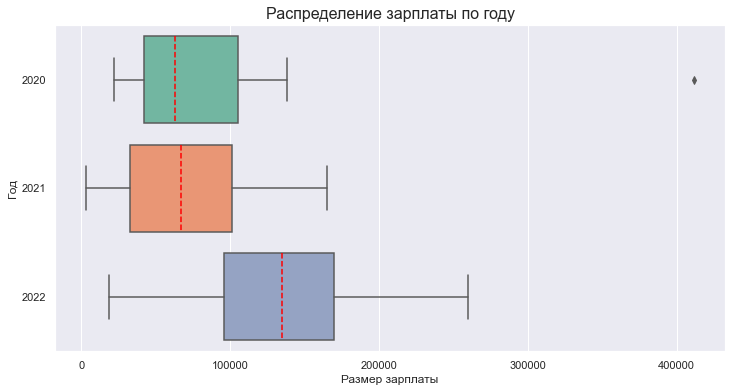

Зарплата в зависимости от года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.00,62726.0,105000.00,412000.0
2021,44.0,70215.77,45843.82,2859.0,32793.75,67233.5,100922.75,165000.0
2022,65.0,131366.94,55785.24,18442.0,95550.00,135000.0,170000.00,260000.0


In [115]:
show_comparative_boxplots_and_describe(data=data_ds_salaries, 
                                        numeric_column='salary_in_usd', category_column='work_year', 
                                        numeric_title='Размер зарплаты', category_title='Год',
                                        boxplots_title='Распределение зарплаты по году', 
                                        describe_title='Зарплата в зависимости от года'
                                        )

> Визуально можно сделать предположение, зарплаты в 2020 и 2021 годах примерно одинаковы,  и рост есть в 2022.

### 5.2. Зарплата в зависимости от опыта работы <a class="anchor" id="item_5_2"></a>

Напомним описание содержимого столбца:

- `experience_level` - Опыт работы на этой должности в течение года со следующими возможными значениями: 
    - *EN* — Entry-level/Junior;
    - *MI* — Mid-level/Intermediate;
    - *SE* — Senior-level/Expert;
    - *EX* — Executive-level/Director.

#### Для всех должностей

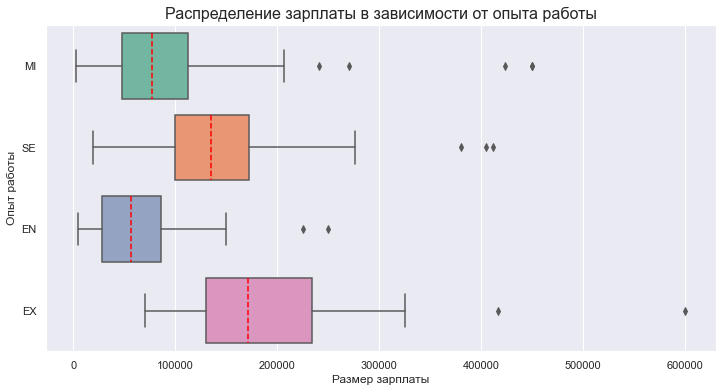

Зарплата в зависимости от опыта работы


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.00,56500.0,85425.75,250000.0
EX,26.0,199392.04,117071.26,69741.0,130006.50,171437.5,233750.00,600000.0
MI,208.0,87793.00,64118.97,2859.0,47163.75,76940.0,112075.00,450000.0
SE,243.0,138374.88,59955.97,18907.0,99531.50,135000.0,171881.00,412000.0


In [116]:
show_comparative_boxplots_and_describe(data=data_salaries, 
                                        numeric_column='salary_in_usd', category_column='experience_level', 
                                        numeric_title='Размер зарплаты', category_title='Опыт работы',
                                        boxplots_title='Распределение зарплаты в зависимости от опыта работы', 
                                        describe_title='Зарплата в зависимости от опыта работы'
                                        )

> Визуально можно сделать вывод, что зарплата растет в зависимости от опыта работы \
в следующем порядке (от меньшего к большему):
>
>1. *EN* — Entry-level/Junior
>2. *MI* — Mid-level/Intermediate;
>3. *SE* — Senior-level/Expert;
>4. *EX* — Executive-level/Director.

#### Для должности Data Scientist

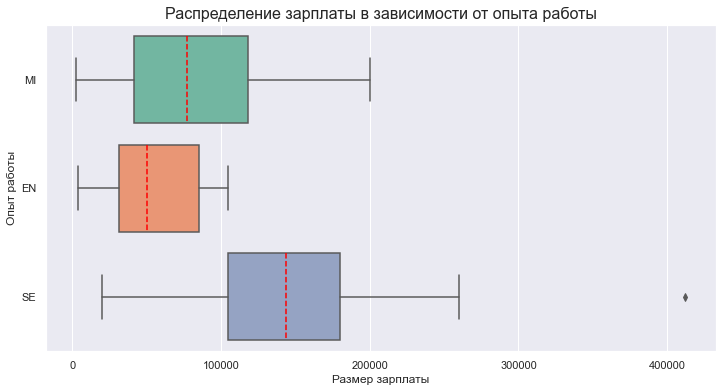

Зарплата в зависимости от опыта работы


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,22.0,55330.91,31237.82,4000.0,31474.0,50483.5,85027.25,105000.0
MI,59.0,81891.76,47257.88,2859.0,41339.0,76958.0,118529.50,200000.0
SE,49.0,150710.86,62918.63,20171.0,104890.0,144000.0,180000.00,412000.0


In [117]:
show_comparative_boxplots_and_describe(data=data_ds_salaries, 
                                        numeric_column='salary_in_usd', category_column='experience_level', 
                                        numeric_title='Размер зарплаты', category_title='Опыт работы',
                                        boxplots_title='Распределение зарплаты в зависимости от опыта работы', 
                                        describe_title='Зарплата в зависимости от опыта работы'
                                        )

> Визуально можно сделать вывод, что зарплата растет в зависимости от опыта работы \
в следующем порядке (от меньшего к большему):
>
>1. *EN* — Entry-level/Junior
>2. *MI* — Mid-level/Intermediate;
>3. *SE* — Senior-level/Expert;
>
>И среди сотрудников с должностью Data Scientist нет уровня *EX — Executive-level/Director*.

### 5.3. Зарплата в зависимости от типа трудоустройства <a class="anchor" id="item_5_3"></a>

Напомним описание содержимого столбца:

- `employment_type` - Тип трудоустройства для этой роли:
    - *PT* — неполный рабочий день;
    - *FT* — полный рабочий день;
    - *CT* — контракт;
    - *FL* — фриланс.

#### Для всех должностей

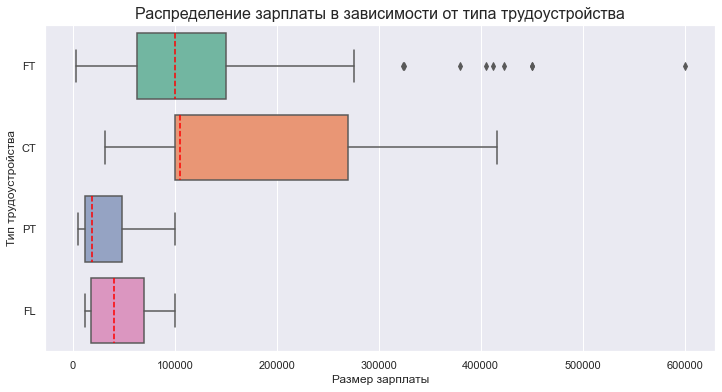

Зарплата в зависимости от типа трудоустройства


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,5.0,184575.00,156250.89,31875.0,100000.0,105000.0,270000.0,416000.0
FL,4.0,48000.00,40529.82,12000.0,18000.0,40000.0,70000.0,100000.0
FT,546.0,111811.84,70790.70,2859.0,62726.0,100000.0,150000.0,600000.0
PT,10.0,33070.50,31472.91,5409.0,12000.0,18817.5,48370.0,100000.0


In [118]:
show_comparative_boxplots_and_describe(data=data_salaries, 
                                numeric_column='salary_in_usd', category_column='employment_type', 
                                numeric_title='Размер зарплаты', category_title='Тип трудоустройства',
                                boxplots_title='Распределение зарплаты в зависимости от типа трудоустройства', 
                                describe_title='Зарплата в зависимости от типа трудоустройства'
                                )

> Наибольшее количество значений в таблице указано для типа трудоустройства\
> *FT* — полный рабочий день
> 
> Для остальных значений количество записей не превышает 10.
> 
> Тем не менее по графику можно предположить, что величина зарплаты зависит от типа трудоустройства.

#### Для должности Data Scientist

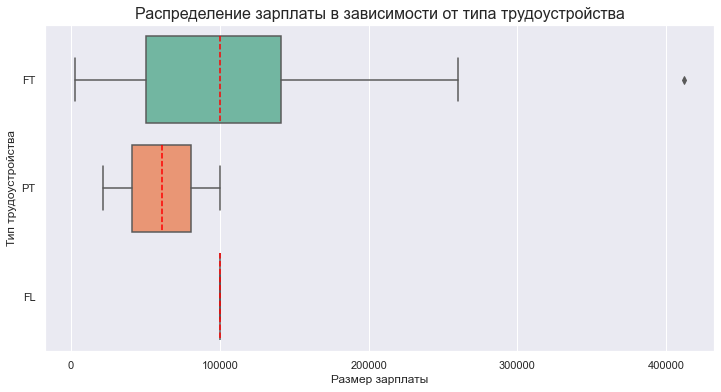

Зарплата в зависимости от типа трудоустройства


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
FL,1.0,100000.00,NaN,100000.0,100000.00,100000.0,100000.00,100000.0
FT,127.0,104031.94,64309.23,2859.0,50660.50,100000.0,140850.00,412000.0
PT,2.0,60834.50,55388.38,21669.0,41251.75,60834.5,80417.25,100000.0


In [119]:
show_comparative_boxplots_and_describe(data=data_ds_salaries, 
                                numeric_column='salary_in_usd', category_column='employment_type', 
                                numeric_title='Размер зарплаты', category_title='Тип трудоустройства',
                                boxplots_title='Распределение зарплаты в зависимости от типа трудоустройства', 
                                describe_title='Зарплата в зависимости от типа трудоустройства'
                                )

> Наибольшее количество значений также указано для типа трудоустройства\
> *FT* — полный рабочий день
> 
> Для остальных значений количество записей 1 и 2 записи.
> 
> Тут можно сказать. что недостаточно данных для выводов.

### 5.4. Зарплата в зависимости от должности <a class="anchor" id="item_5_4"></a>

Напомним описание содержимого столбца:

- `job_title` - Роль, в которой соискатель работал в течение года.

#### Для всех должностей

Рассмотрим разницу для первых шести наиболее часто встречающихся названий должностей.

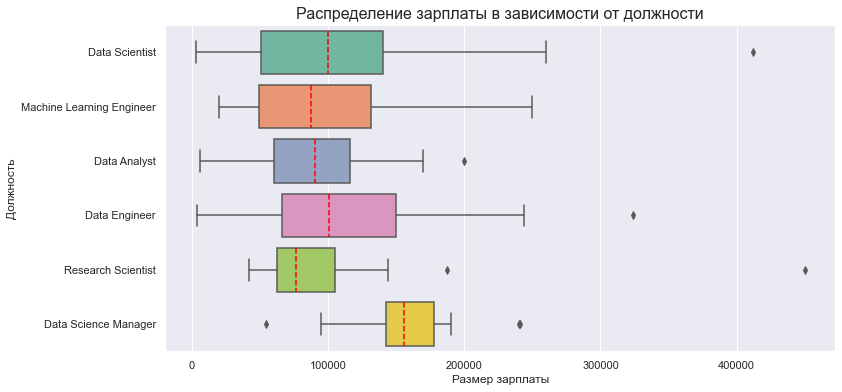

Зарплата в зависимости от должности


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Analyst,82.0,90089.60,40686.26,6072.0,60325.00,90000.0,116112.5,200000.0
Data Engineer,121.0,109750.03,58203.68,4000.0,66022.00,100800.0,150000.0,324000.0
Data Science Manager,12.0,158328.50,52589.18,54094.0,142285.25,155750.0,178050.0,241000.0
Data Scientist,130.0,103336.35,63967.56,2859.0,50330.25,100000.0,140400.0,412000.0
Machine Learning Engineer,39.0,101165.13,62518.56,20000.0,49173.00,87425.0,131500.0,250000.0
Research Scientist,16.0,109019.50,98542.76,42000.0,62176.00,76263.5,105000.0,450000.0


In [120]:
data_to_analise =\
get_data_with_most_frequent_values(data=data_salaries, column_name='job_title', values_count=6)

show_comparative_boxplots_and_describe(data=data_to_analise, 
                                        numeric_column='salary_in_usd', category_column='job_title', 
                                        numeric_title='Размер зарплаты', category_title='Должность',
                                        boxplots_title='Распределение зарплаты в зависимости от должности', 
                                        describe_title='Зарплата в зависимости от должности'
                                        )

> По графику можно предположить, что зарплаты различаются в зависимости от должности.

### 5.5. Зарплата в зависимости от страны проживания сотрудника <a class="anchor" id="item_5_5"></a>

Напомним описание содержимого столбца:

- `employee_residence` - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

#### Для всех должностей

Рассмотрим распределение для первых 10 наиболее часто встречающихся стран.

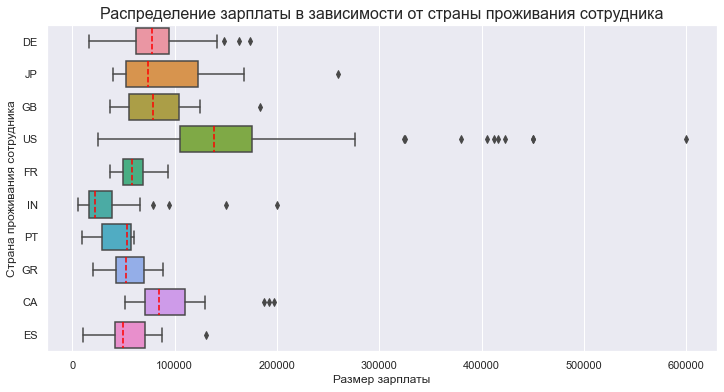

Зарплата в зависимости от страны проживания сотрудника


,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
CA,27.0,97191.63,40151.79,52000.0,71349.00,85000.0,110397.50,196979.0
DE,24.0,85336.67,40215.64,15966.0,62411.25,78015.0,94859.50,173762.0
ES,15.0,57593.40,28395.03,10354.0,41371.00,49461.0,71444.50,130800.0
FR,18.0,59886.61,15848.69,36643.0,49734.50,57920.0,69342.50,93427.0
GB,43.0,81470.07,30283.75,37300.0,55247.00,78526.0,103931.00,183228.0
GR,12.0,56445.75,21544.77,20000.0,43021.75,52209.0,70556.00,88654.0
IN,30.0,37322.33,43741.19,5409.0,16397.00,22124.0,38812.75,200000.0
JP,7.0,103537.71,81283.30,40000.0,52700.00,74000.0,122682.00,260000.0
PT,6.0,42862.50,21443.78,10000.0,29032.25,53090.0,57691.25,60757.0


In [121]:
data_to_analise =\
get_data_with_most_frequent_values(data=data_salaries, column_name='employee_residence', values_count=10)

show_comparative_boxplots_and_describe(data=data_to_analise, 
                        numeric_column='salary_in_usd', category_column='employee_residence', 
                        numeric_title='Размер зарплаты', category_title='Страна проживания сотрудника',
                        boxplots_title='Распределение зарплаты в зависимости от страны проживания сотрудника', 
                        describe_title='Зарплата в зависимости от страны проживания сотрудника'
                        )

> Судя по графику зарплаты различаются в зависимости от страны проживания сотрудника.\
И наибольшие зарплаты у сотрудников, проживающих в US (Unated State, США).

#### Для должности Data Scientist

Рассмотрим распределение для первых 6 наиболее часто встречающихся стран.

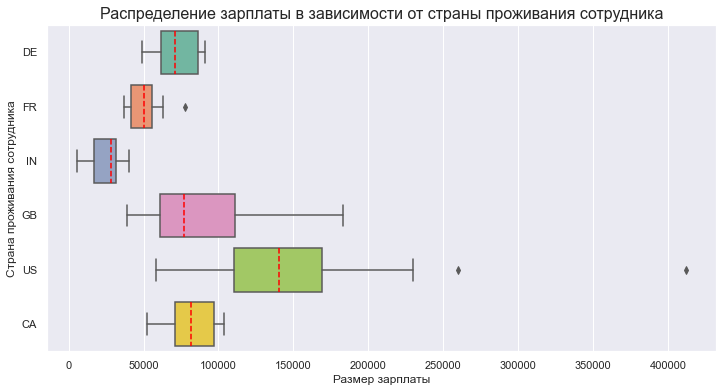

Зарплата в зависимости от страны проживания сотрудника


,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
CA,6.0,81489.17,19500.74,52396.0,70945.50,81756.0,96934.50,103691.0
DE,6.0,72113.67,16752.86,49268.0,61781.75,71279.5,86448.75,90734.0
FR,8.0,51665.62,13412.16,36643.0,41626.75,50483.5,55575.50,77684.0
GB,11.0,88177.36,41393.50,39263.0,60847.00,76958.0,110808.00,183228.0
IN,9.0,23838.33,11758.72,5679.0,16904.00,28399.0,31615.00,40481.0
US,66.0,147082.58,54499.36,58000.0,110500.00,140200.0,169250.00,412000.0


In [122]:
data_to_analise =\
get_data_with_most_frequent_values(data=data_ds_salaries, column_name='employee_residence', values_count=6)

show_comparative_boxplots_and_describe(data=data_to_analise, 
                        numeric_column='salary_in_usd', category_column='employee_residence', 
                        numeric_title='Размер зарплаты', category_title='Страна проживания сотрудника',
                        boxplots_title='Распределение зарплаты в зависимости от страны проживания сотрудника', 
                        describe_title='Зарплата в зависимости от страны проживания сотрудника'
                        )

> Судя по графику зарплаты различаются в зависимости от страны проживания сотрудника.\
И наибольшие зарплаты у сотрудников, проживающих в US (Unated State, США).

### 5.6. Зарплата в зависимости от формата работы <a class="anchor" id="item_5_6"></a>

Напомним описание содержимого столбца:

- `remote_ratio` - Общий объём работы, выполняемой удалённо. Возможные значения:
    - *NOT* — удалённой работы нет (менее 20 %);
    - *HALF* — частично удалённая работа;
    - *FULL* — полностью удалённая работа (более 80 %).

#### Для всех должностей

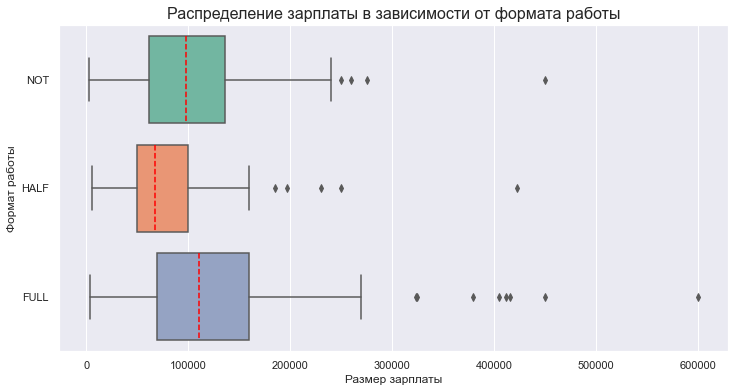

Зарплата в зависимости от формата работы


,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
FULL,346.0,120763.19,74930.43,4000.0,70000.0,110712.5,159750.00,600000.0
HALF,98.0,80721.90,57639.10,5409.0,50000.5,68010.5,99925.75,423000.0
NOT,121.0,105785.40,68392.50,2859.0,62000.0,98158.0,136000.00,450000.0


In [123]:
show_comparative_boxplots_and_describe(data=data_salaries, 
                        numeric_column='salary_in_usd', category_column='remote_ratio', 
                        numeric_title='Размер зарплаты', category_title='Формат работы',
                        boxplots_title='Распределение зарплаты в зависимости от формата работы', 
                        describe_title='Зарплата в зависимости от формата работы'
                        )

> Судя по графику зарплата зависит от формата работы.\
И значения располагаются в следующем порядке (по возрастанию): 
>1. *HALF* — частично удалённая работа
>2. *NOT* — удалённой работы нет (менее 20 %)
>3. *FULL* — полностью удалённая работа (более 80 %)

#### Для должности Data Scientist

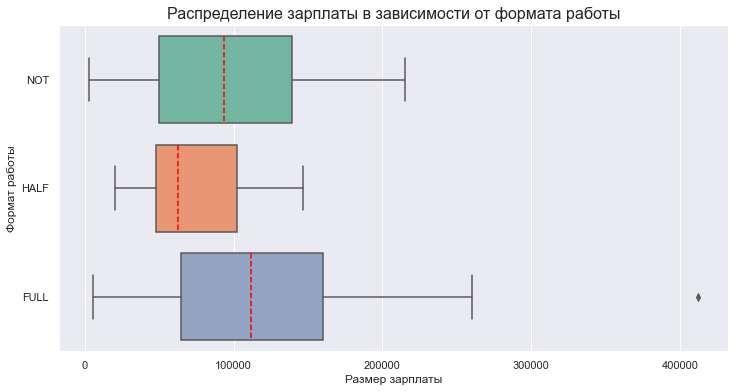

Зарплата в зависимости от формата работы


,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
FULL,68.0,116484.54,70908.36,5679.0,64420.00,111500.0,160000.0,412000.0
HALF,24.0,73827.83,36204.18,20171.0,47783.75,62726.0,102250.0,147000.0
NOT,38.0,98444.97,58647.60,2859.0,49781.25,93582.0,139050.0,215300.0


In [124]:
show_comparative_boxplots_and_describe(data=data_ds_salaries, 
                        numeric_column='salary_in_usd', category_column='remote_ratio', 
                        numeric_title='Размер зарплаты', category_title='Формат работы',
                        boxplots_title='Распределение зарплаты в зависимости от формата работы', 
                        describe_title='Зарплата в зависимости от формата работы'
                        )

> Здесь различия прослеживаются не так явно, как для всех должностей.\
Но предположение можно сделать то же, что зарплата зависит от формата работы.\
И значения располагаются в следующем порядке (по возрастанию): 
>1. *HALF* — частично удалённая работа
>2. *NOT* — удалённой работы нет (менее 20 %)
>3. *FULL* — полностью удалённая работа (более 80 %)

### 5.7. Зарплата в зависимости от страны офиса работодателя <a class="anchor" id="item_5_7"></a>

Напомним описание содержимого столбца:

- `company_location` - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.

#### Для всех должностей

Рассмотрим распределение для первых 10 наиболее часто встречающихся стран.

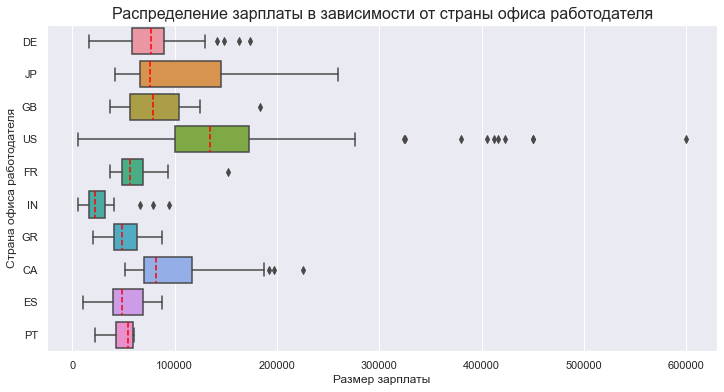

Зарплата в зависимости от страны офиса работодателя


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
CA,28.0,100121.86,47080.71,52000.0,70518.00,81895.5,117374.75,225000.0
DE,27.0,81559.56,39903.44,15966.0,58669.00,76833.0,89694.00,173762.0
ES,14.0,53060.14,21090.92,10354.0,40073.50,48371.5,68793.00,87932.0
FR,15.0,63970.67,28679.63,36643.0,48202.50,56738.0,69143.00,152000.0
GB,46.0,81649.50,29846.70,37300.0,56915.50,78526.0,104316.50,183228.0
GR,10.0,52026.70,20357.15,20000.0,41133.25,48680.0,63201.00,87932.0
IN,24.0,28581.75,22697.67,5409.0,16735.00,22124.0,32163.25,94665.0
JP,6.0,114127.33,83584.64,41689.0,66283.25,75682.0,145341.00,260000.0
PT,4.0,47793.75,17789.25,21983.0,43130.75,54217.5,58880.50,60757.0


In [125]:
data_to_analise =\
get_data_with_most_frequent_values(data=data_salaries, column_name='company_location', values_count=10)

show_comparative_boxplots_and_describe(data=data_to_analise, 
                        numeric_column='salary_in_usd', category_column='company_location', 
                        numeric_title='Размер зарплаты', category_title='Страна офиса работодателя',
                        boxplots_title='Распределение зарплаты в зависимости от страны офиса работодателя', 
                        describe_title='Зарплата в зависимости от страны офиса работодателя'
                        )

> Судя по графику зарплаты различаются в зависимости от страны офиса работодателя.\
И наибольшие зарплаты у офисов, расположенных в US (Unated State, США).

#### Для должности Data Scientist

Рассмотрим распределение для первых 5 наиболее часто встречающихся стран.

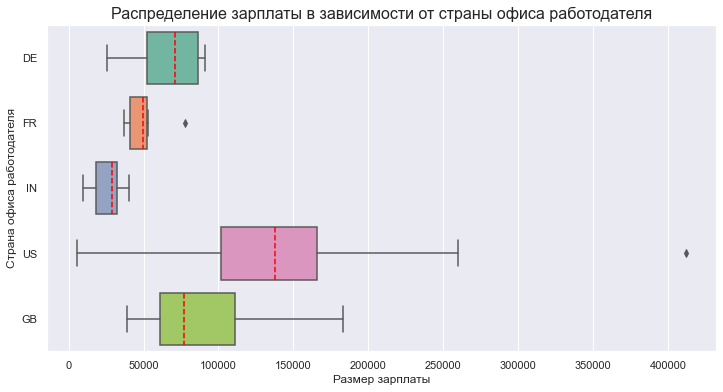

Зарплата в зависимости от страны офиса работодателя


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
DE,6.0,66124.50,25473.80,25532.0,52632.5,71279.5,86448.75,90734.0
FR,7.0,50085.57,13658.91,36643.0,41056.5,49646.0,52256.50,77684.0
GB,11.0,88177.36,41393.50,39263.0,60847.0,76958.0,110808.00,183228.0
IN,8.0,26108.25,10248.05,9466.0,18057.5,29075.0,32163.25,40481.0
US,72.0,139934.96,58150.12,5679.0,101575.0,137485.0,165665.00,412000.0


In [126]:
data_to_analise =\
get_data_with_most_frequent_values(data=data_ds_salaries, column_name='company_location', values_count=5)

show_comparative_boxplots_and_describe(data=data_to_analise, 
                        numeric_column='salary_in_usd', category_column='company_location', 
                        numeric_title='Размер зарплаты', category_title='Страна офиса работодателя',
                        boxplots_title='Распределение зарплаты в зависимости от страны офиса работодателя', 
                        describe_title='Зарплата в зависимости от страны офиса работодателя'
                        )

> Судя по графику зарплаты различаются в зависимости от страны офиса работодателя.\
И наибольшие зарплаты также у офисов, расположенных в US (Unated State, США).

### 5.8. Зарплата в зависимости от размера компании <a class="anchor" id="item_5_8"></a>

Напомним описание содержимого столбца:

- `company_size` - Среднее количество людей, работавших в компании в течение года:
    - *S* — менее 50 сотрудников (небольшая компания);
    - *M* — от 50 до 250 сотрудников (средняя компания);
    - *L* — более 250 сотрудников (крупная компания).

#### Для всех должностей

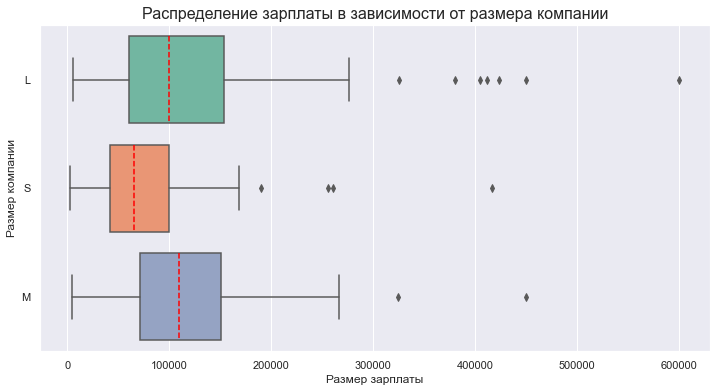

Зарплата в зависимости от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,193.0,118213.88,86753.27,5882.0,60000.0,100000.0,153667.00,600000.0
M,290.0,114807.08,60779.04,4000.0,70821.5,109640.0,150213.75,450000.0
S,82.0,77872.10,63814.52,2859.0,41816.0,65511.0,100000.00,416000.0


In [127]:
show_comparative_boxplots_and_describe(data=data_salaries, 
                        numeric_column='salary_in_usd', category_column='company_size', 
                        numeric_title='Размер зарплаты', category_title='Размер компании',
                        boxplots_title='Распределение зарплаты в зависимости от размера компании', 
                        describe_title='Зарплата в зависимости от размера компании'
                        )

> По графику можно сделать вывод, что  в небольших компаниях размер зарплаты меньше,\
чем в средних и крупных.\
Размер зарплаты различается в зависимости от размера компании.

#### Для должности Data Scientist

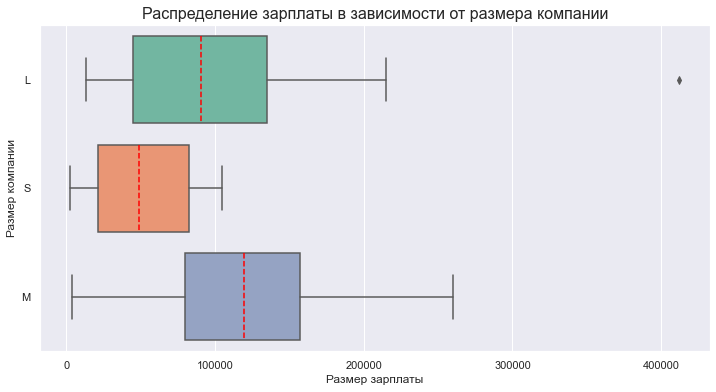

Зарплата в зависимости от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,43.0,102743.42,73254.10,13400.0,45240.5,90734.0,135000.0,412000.0
M,66.0,120080.58,56347.79,4000.0,80000.0,119529.5,157500.0,260000.0
S,21.0,51925.76,33216.29,2859.0,21669.0,49268.0,82500.0,105000.0


In [128]:
show_comparative_boxplots_and_describe(data=data_ds_salaries, 
                        numeric_column='salary_in_usd', category_column='company_size', 
                        numeric_title='Размер зарплаты', category_title='Размер компании',
                        boxplots_title='Распределение зарплаты в зависимости от размера компании', 
                        describe_title='Зарплата в зависимости от размера компании'
                        )

> По графику можно сделать предположение, размер зарплаты увеличивается \
в зависимости от типа компании в следующем порядке:
> - S 
> - L
> - M
>
> То есть, в средних компаниях зарплата больше, чем в крупных. Что интересно.\
Размер зарплаты различается в зависимости от размера компании.

### 5.9. Предварительный вывод о влиянии признаков на заработную плату <a class="anchor" id="item_5_9"></a>

#### Для всех должностей

> На размер заработной платы влияют все признаки.

#### Для должности Data Scientist

> На размер заработной платы влияют все признаки, кроме:
> - `employment_type` - тип трудоустройства (не хватает данных для выводов);
> - `job_title` - роль (должность), так как мы рассматриваем данные только для одного значения.

## 6. Предварительное исследование по остальным вопросам HR-агентства <a class="anchor" id="item_6"></a>

### 6.1. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году? <a class="anchor" id="item_6_1"></a>

Напомним описание столбцов:
- `job_title` - Роль, в которой соискатель работал в течение года.
- `work_year` - Год, в котором была выплачена зарплата.

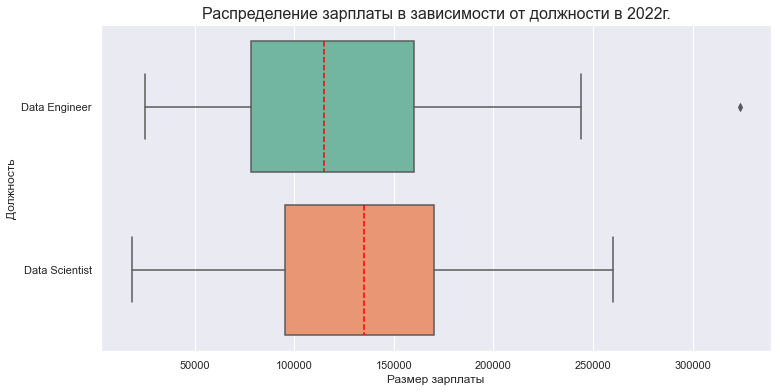

Зарплата в зависимости от должности в 2022г.


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,79.0,124651.78,57846.84,25000.0,78526.0,115000.0,160040.0,324000.0
Data Scientist,65.0,131366.94,55785.24,18442.0,95550.0,135000.0,170000.0,260000.0


In [129]:
# Маска для выбора строк с заданными названиями должностей
job_titles_list = ['Data Scientist', 'Data Engineer']
job_titles_mask = data_salaries['job_title'].isin(job_titles_list)

# Маска для выбора строк с нужным годом
year_mask = data_salaries['work_year'] == 2022

# Отфильтровываем данные по двум маскам
data_to_analise = data_salaries[job_titles_mask & year_mask]

show_comparative_boxplots_and_describe(data=data_to_analise, 
                        numeric_column='salary_in_usd', category_column='job_title', 
                        numeric_title='Размер зарплаты', category_title='Должность',
                        boxplots_title='Распределение зарплаты в зависимости от должности в 2022г.', 
                        describe_title='Зарплата в зависимости от должности в 2022г.'
                        )

> По графику можно сделать предположение, что в 2022г. у **Data Scientist** зарплаты были больше, чем у **Data Engineer**.

### 6.2. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании? <a class="anchor" id="item_6_2"></a>

Напомним описание столбцов:
- `job_title` - Роль, в которой соискатель работал в течение года.
- `company_size` - Среднее количество людей, работавших в компании в течение года:
    - *S* — менее 50 сотрудников (небольшая компания);
    - *M* — от 50 до 250 сотрудников (средняя компания);
    - *L* — более 250 сотрудников (крупная компания).

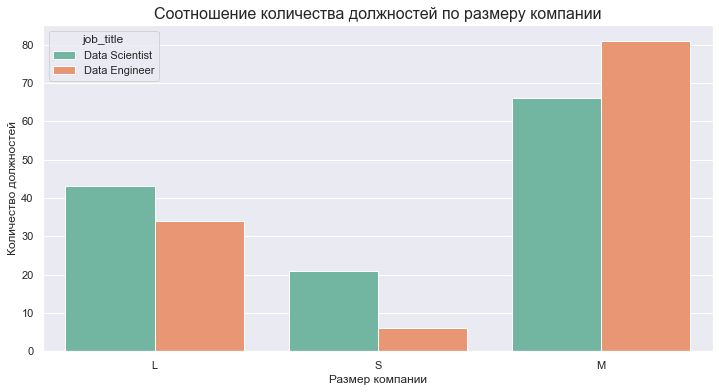

In [130]:
# Оставим для исследования данные только по двум должностям
data_to_analise = data_salaries[job_titles_mask]

# Строим график
fig = plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data_to_analise, x=data_to_analise['company_size'], hue='job_title')
ax.set(xlabel='Размер компании', ylabel='Количество должностей')
plt.title('Соотношение количества должностей по размеру компании', fontsize=16)
plt.show()

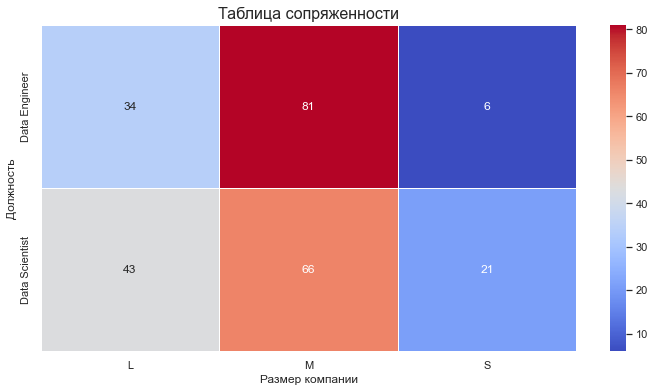

In [131]:
# Построим таблицу сопряженности
cross_tab = pd.crosstab(index=data_to_analise['job_title'], columns=data_to_analise['company_size'])

fig = plt.figure(figsize=(12, 6))
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Размер компании', ylabel='Должность')
plt.title('Таблица сопряженности', fontsize=16)
plt.show()

> Судя по графику связь между наличием должностей **Data Scientist** и **Data Engineer** и размером компании есть.

## 7. Статистический анализ влияния признаков на размер зарплаты <a class="anchor" id="item_7"></a>

In [132]:
# Задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))


# Функции для дальнейшего использования


"""Функция для принятия решения о нормальности
p: float - значение p-value, полученное в результате теста
return: void
"""
def decide_normal_distribution(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))
    print()


"""Функия для определения равенства дисперсий
p: float - значение p-value, полученное в результате теста
return: void
"""
def decide_equality_of_variances(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
    else:
        print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')


"""Функция для принятия решения об отклонении нулевой гипотезы
p: float - значение p-value, полученное в результате теста
return: void
"""
def decide_validity_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


"""Возвращает данные выборки по зарплате
column_name: str - название стобца, по значению которого будем фильтровать строки
column_value: str|int - значение столбца
data: DataFrame - таблица с данными
return: Series
"""
def get_salary_sample(column_name, column_value, data):
    salary_sample = data.loc[data[column_name]==column_value, 'salary_in_usd']
    return salary_sample


"""Возвращает список выборок по зарплате
column_name: str - название стобца, по значениям которого будем фильтровать строки
column_values_list: List[str|int] - список со значениями столбца, для которых будем формировать выборки
data: DataFrame - таблица с данными
return: List[Series]
"""
def get_salary_samples_list(column_name, column_values_list, data):
    salary_samples_list = []
    for value in column_values_list:
        salary_sample = get_salary_sample(column_name, value, data)
        salary_samples_list.append(salary_sample)
    return salary_samples_list


"""Проверяет переданный список выборок на нормальное распределение
samples_list: List[Series] - список выборок
return: void
"""
def check_samples_to_normal_distribution(samples_list):
    for sample in samples_list:
        result = stats.shapiro(sample)
        decide_normal_distribution(result[1])


Уровень значимости alpha = 0.05


### 7.1. Зависит ли заработная плата от года? <a class="anchor" id="item_7_1"></a>

Напомним описание содержимого столбца:
- `work_year` - Год, в котором была выплачена зарплата.

#### Для всех должностей

##### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: размер зарплаты за все года одинаковый: \
2020 ($μ_1$), 2021 ($μ_2$), 2022 ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза*: размер зарплаты различается за разные года: \
2020 ($μ_1$), 2021 ($μ_2$), 2022 ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$

##### Проверка на нормальность

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [133]:
# Получим выборки с зарплатами за разные года
salary_samples_list = get_salary_samples_list('work_year', [2020, 2021, 2022], data_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать **критерий Краскела-Уоллиса**.

##### Проведем тест

In [134]:
# Проводим тест
_, p = stats.kruskal(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Размер зарплаты за разные года различается.

#### Для должности Data Scientist

##### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: размер зарплаты за все года одинаковый: \
2020 ($μ_1$), 2021 ($μ_2$), 2022 ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза*: размер зарплаты различается за разные года: \
2020 ($μ_1$), 2021 ($μ_2$), 2022 ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$

##### Проверка на нормальность

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [135]:
# Получим выборки с зарплатами за разные года
salary_samples_list = get_salary_samples_list('work_year', [2020, 2021, 2022], data_ds_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать **критерий Краскела-Уоллиса**.

##### Проведем тест

In [136]:
# Проводим тест
_, p = stats.kruskal(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Размер зарплаты за разные года различается.

### 7.2. Зависит ли заработная плата от опыта работы? <a class="anchor" id="item_7_2"></a>

Напомним описание содержимого столбца:

- `experience_level` - Опыт работы на этой должности в течение года со следующими возможными значениями: 
    - *EN* — Entry-level/Junior;
    - *MI* — Mid-level/Intermediate;
    - *SE* — Senior-level/Expert;
    - *EX* — Executive-level/Director.

#### Для всех должностей

##### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: размер зарплаты одинаковый для каждого опыта работы: \
EN ($μ_1$), MI ($μ_2$), SE ($μ_3$), EX ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4 $$

*Альтернативная гипотеза*: размер зарплаты различается в зависимости от опыта работы: \
EN ($μ_1$), MI ($μ_2$), SE ($μ_3$), EX ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [137]:
# Получим выборки с зарплатами для каждого опыта работы
salary_samples_list = get_salary_samples_list('experience_level', ['EN', 'MI', 'SE', 'EX'], data_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать **критерий Краскела-Уоллиса**.

##### Проведем тест

In [138]:
# Проводим тест
_, p = stats.kruskal(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Размер зарплаты различается в зависимости от опыта работы.

#### Для должности Data Scientist

##### Сформулируем нулевую и альтернативные гипотезы

Для должности Data Scientist нет уровня EX, поэтому рассмотрим только три значения.

*Нулевая гипотеза*: размер зарплаты одинаковый для каждого опыта работы: \
EN ($μ_1$), MI ($μ_2$), SE ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза*: размер зарплаты различается в зависимости от опыта работы: \
EN ($μ_1$), MI ($μ_2$), SE ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [139]:
# Получим выборки с зарплатами для каждого опыта работы
salary_samples_list = get_salary_samples_list('experience_level', ['EN', 'MI', 'SE'], data_ds_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.174
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.146
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать **критерий Краскела-Уоллиса**.

##### Проведем тест

In [140]:
# Проводим тест
_, p = stats.kruskal(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Размер зарплаты различается в зависимости от опыта работы.

### 7.3. Зависит ли заработная плата от типа трудоустройства?  <a class="anchor" id="item_7_3"></a>

Напомним описание содержимого столбца:
- `employment_type` - Тип трудоустройства для этой роли:
    - *PT* — неполный рабочий день;
    - *FT* — полный рабочий день;
    - *CT* — контракт;
    - *FL* — фриланс.

#### Для всех должностей

##### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: размер зарплаты одинаковый для каждого типа трудоустройства: \
PT ($μ_1$), FT ($μ_2$), CT ($μ_3$), FL ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4 $$

*Альтернативная гипотеза*: размер зарплаты различается в зависимости от типа трудоустройства: \
PT ($μ_1$), FT ($μ_2$), CT ($μ_3$), FL ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [141]:
# Получим выборки с зарплатами для каждого типа трудоустройства
salary_samples_list = get_salary_samples_list('employment_type', ['PT', 'FT', 'CT', 'FL'], data_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.406
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.507
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать **критерий Краскела-Уоллиса**.

##### Проведем тест

In [142]:
# Проводим тест
_, p = stats.kruskal(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Размер зарплаты различается в зависимости от типа трудоустройства.

### 7.4. Зависит ли заработная плата от должности? <a class="anchor" id="item_7_4"></a>

Напомним описание содержимого столбца:
- `job_title` - Роль, в которой соискатель работал в течение года.

Будем рассматривать различия для шести наиболее часто встречающихся должностей:\
**Data Scientist**, **Data Engineer**, **Data Analyst**, \
**Machine Learning Engineer**, **Research Scientist**, **Data Science Manager**

#### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: размер зарплаты одинаковый для каждой должности: \
Data Scientist ($μ_1$), Data Engineer ($μ_2$), Data Analyst ($μ_3$), \
Machine Learning Engineer ($μ_4$), Research Scientist ($μ_5$),\
Data Science Manager ($μ_6$)

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4 = μ_5 = μ_6 $$

*Альтернативная гипотеза*: размер зарплаты различается в зависимости от должности: \
Data Scientist ($μ_1$), Data Engineer ($μ_2$), Data Analyst ($μ_3$), \
Machine Learning Engineer ($μ_4$), Research Scientist ($μ_5$),\
Data Science Manager ($μ_6$)

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4 \neq μ_5 \neq μ_6 $$

#### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [143]:
# Получим выборки с зарплатами для каждой должности
salary_samples_list = get_salary_samples_list(
    'job_title',
    ['Data Scientist', 'Data Engineer', 'Data Analyst', 
     'Machine Learning Engineer', 'Research Scientist', 'Data Science Manager'],
    data_salaries
    )

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.004
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.829
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.015
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.473
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным



#### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Распределн нормально только для одной группы. 

Для проверки нашей гипотезы можно использовать **критерий Краскела-Уоллиса**.

#### Проведем тест

In [144]:
# Проводим тест
_, p = stats.kruskal(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.008
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


#### Вывод

> Размер зарплаты зависит от должности.

### 7.5. Зависит ли заработная плата от страны проживания сотрудника? <a class="anchor" id="item_7_5"></a>

Напомним описание содержимого столбца:
- `employee_residence` - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

#### Для всех должностей

Будем рассматривать различия для 4-х наиболее часто встречающихся стран:
- US - United States
- GB - United Kingdom
- IN - India
- CA - Canada

##### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: размер зарплаты одинаковый для всех стран проживания сотрудников: \
US ($μ_1$), GB ($μ_2$), IN ($μ_3$), CA ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4 $$

*Альтернативная гипотеза*: размер зарплаты различается в зависимости страни проживания сотрудника: \
US ($μ_1$), GB ($μ_2$), IN ($μ_3$), CA ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [145]:
# Получим выборки с зарплатами для каждой страны
salary_samples_list = get_salary_samples_list('employee_residence', ['US', 'GB', 'IN', 'CA'], data_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.016
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать **критерий Краскела-Уоллиса**.

##### Проведем тест

In [146]:
# Проводим тест
_, p = stats.kruskal(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Размер зарплаты зависит от страны проживания сотрудника.

#### Для должности Data Scientist

Будем рассматривать различия для 4-х наиболее часто встречающихся стран:

- US - United States
- GB - United Kingdom
- IN - India
- FR - France

##### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: размер зарплаты одинаковый для всех стран проживания сотрудников: \
US ($μ_1$), GB ($μ_2$), IN ($μ_3$), FR ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4 $$

*Альтернативная гипотеза*: размер зарплаты различается в зависимости страни проживания сотрудника: \
US ($μ_1$), GB ($μ_2$), IN ($μ_3$), FR ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [147]:
# Получим выборки с зарплатами для каждой страны
salary_samples_list = get_salary_samples_list('employee_residence', ['US', 'GB', 'IN', 'FR'], data_ds_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.277
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.661
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.444
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать **критерий Краскела-Уоллиса**.

##### Проведем тест

In [148]:
# Проводим тест
_, p = stats.kruskal(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Размер зарплаты зависит от страны проживания сотрудника.

### 7.6. Зависит ли заработная плата от формата работы? <a class="anchor" id="item_7_6"></a>

Напомним описание содержимого столбца:
- `remote_ratio` - Общий объём работы, выполняемой удалённо. Возможные значения:
    - *NOT* — удалённой работы нет (менее 20 %);
    - *HALF* — частично удалённая работа;
    - *FULL* — полностью удалённая работа (более 80 %).

#### Для всех должностей

##### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: размер зарплаты одинаковый для всех форматов работы: \
NOT ($μ_1$), HALF ($μ_2$), FULL ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза*: размер зарплаты различается в зависимости от формата работы: \
NOT ($μ_1$), HALF ($μ_2$), FULL ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [149]:
# Получим выборки с зарплатами для каждого формата работы
salary_samples_list = get_salary_samples_list('remote_ratio', ['NOT', 'HALF', 'FULL'], data_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать **критерий Краскела-Уоллиса**.

##### Проведем тест

In [150]:
# Проводим тест
_, p = stats.kruskal(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Размер зарплаты зависит от формата работы.

#### Для должности Data Scientist

##### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: размер зарплаты одинаковый для всех форматов работы: \
NOT ($μ_1$), HALF ($μ_2$), FULL ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза*: размер зарплаты различается в зависимости от формата работы: \
NOT ($μ_1$), HALF ($μ_2$), FULL ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [151]:
# Получим выборки с зарплатами для каждого формата работы
salary_samples_list = get_salary_samples_list('remote_ratio', ['NOT', 'HALF', 'FULL'], data_ds_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.331
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.387
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать **критерий Краскела-Уоллиса**.

##### Проведем тест

In [152]:
# Проводим тест
_, p = stats.kruskal(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.020
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Размер зарплаты зависит от формата работы.

### 7.7. Зависит ли заработная плата от страны офиса работодателя? <a class="anchor" id="item_7_7"></a>

Напомним описание содержимого столбца:
- `company_location` - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.

#### Для всех должностей

Будем рассматривать различия для 4-х наиболее часто встречающихся стран:
- US - United States
- GB - United Kingdom
- CA - Canada
- DE - Germany

##### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: размер зарплаты одинаковый для всех стран, в которых расположены офисы работодателей: \
US ($μ_1$), GB ($μ_2$), CA ($μ_3$), DE ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4 $$

*Альтернативная гипотеза*: размер зарплаты различается в зависимости стран, в которых расположены офисы работодателей: \
US ($μ_1$), GB ($μ_2$), CA ($μ_3$), DE ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [153]:
# Получим выборки с зарплатами для каждой страны офиса работодателя
salary_samples_list = get_salary_samples_list('company_location', ['US', 'GB', 'CA', 'DE'], data_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.014
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.040
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать **критерий Краскела-Уоллиса**.

##### Проведем тест

In [154]:
# Проводим тест
_, p = stats.kruskal(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Размер зарплаты зависит от страны офиса работодателя.

#### Для должности Data Scientist

Будем рассматривать различия для 4-х наиболее часто встречающихся стран:
- US - United States
- GB - United Kingdom
- IN - India
- FR - France

##### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: размер зарплаты одинаковый для всех стран, в которых расположены офисы работодателей: \
US ($μ_1$), GB ($μ_2$), IN ($μ_3$), FR ($μ_4$).

$$ H_0 : μ_1 = μ_2 = μ_3 = μ_4 $$

*Альтернативная гипотеза*: размер зарплаты различается в зависимости стран, в которых расположены офисы работодателей: \
US ($μ_1$), GB ($μ_2$), IN ($μ_3$), FR ($μ_4$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [155]:
# Получим выборки с зарплатами для каждой страны офиса работодателя
salary_samples_list = get_salary_samples_list('company_location', ['US', 'GB', 'IN', 'FR'], data_ds_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.277
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.761
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.128
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать **критерий Краскела-Уоллиса**.

##### Проведем тест

In [156]:
# Проводим тест
_, p = stats.kruskal(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Размер зарплаты зависит от страны офиса работодателя.

### 7.8. Зависит ли заработная плата от размера компании? <a class="anchor" id="item_7_8"></a>

Напомним описание содержимого столбца:
- `company_size` - Среднее количество людей, работавших в компании в течение года:
    - *S* — менее 50 сотрудников (небольшая компания);
    - *M* — от 50 до 250 сотрудников (средняя компания);
    - *L* — более 250 сотрудников (крупная компания).

#### Для всех должностей

##### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: размер зарплаты одинаковый для компаний всех размеров: \
S ($μ_1$), M ($μ_2$), L ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза*: размер зарплаты различается в зависимости от размера компании: \
S ($μ_1$), M ($μ_2$), L ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [157]:
# Получим выборки с зарплатами для каждого размера компании
salary_samples_list = get_salary_samples_list('company_size', ['S', 'M', 'L'], data_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать **критерий Краскела-Уоллиса**.

##### Проведем тест

In [158]:
# Проводим тест
_, p = stats.kruskal(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Размер зарплаты зависит от размера компании.

#### Для должности Data Scientist

##### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: размер зарплаты одинаковый для компаний всех размеров: \
S ($μ_1$), M ($μ_2$), L ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза*: размер зарплаты различается в зависимости от размера компании: \
S ($μ_1$), M ($μ_2$), L ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [159]:
# Получим выборки с зарплатами для каждого размера компании
salary_samples_list = get_salary_samples_list('company_size', ['S', 'M', 'L'], data_ds_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.897
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать **критерий Краскела-Уоллиса**.

##### Проведем тест

In [160]:
# Проводим тест
_, p = stats.kruskal(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Размер зарплаты зависит от размера компании.

### 7.9. Итоговый вывод о влиянии признаков на заработную плату <a class="anchor" id="item_7_9"></a>

#### Для всех должностей

> На размер заработной платы влияют все признаки:
>- `work_year` - год
>- `experience_level` - опыт работы 
>- `employment_type` - тип трудоустройства
>- `job_title` - должность
>- `employee_residence` - страна проживания сотрудника 
>- `remote_ratio` - формат работы
>- `company_location` - страна офиса работодателя
>- `company_size` - размер компании

#### Для должности Data Scientist

> На размер заработной платы влияют признаки:
> - `work_year` - год
> - `experience_level` - опыт работы 
> - `employee_residence` - страна проживания сотрудника 
> - `remote_ratio` - формат работы
> - `company_location` - страна офиса работодателя
> - `company_size` - размер компании

## 8. Статистический анализ по другим вопросам HR-агентства <a class="anchor" id="item_8"></a>

### 8.1. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist? <a class="anchor" id="item_8_1"></a>

Напомним описание содержимого столбца

- `work_year` - Год, в котором была выплачена зарплата.

Рассмотрим попарно рост в **2020-2021** и в **2021-2022** годах.

#### Рост зарплаты в 2020-2021 годах

##### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: зарплата в 2020 году больше или равна зарплате в 2021 году: \
2020г. ($μ_1$), 2021г. ($μ_2$).

$$ H_0 : μ_1 >= μ_2 $$

*Альтернативная гипотеза*: Зарплата в 2020 году меньше зарплаты в 2021 году: \
2020г. ($μ_1$), 2021г. ($μ_2$).

$$ H_1 : μ_1 < μ_2 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [161]:
# Получим выборки с зарплатами для каждого года
salary_samples_list = get_salary_samples_list('work_year', [2020, 2021], data_ds_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Чтобы проверить нашу гипотезу, можно использовать **U-критерий Манна-Уитни** для сравнения распределений на основе рангов.

##### Проведем тест

In [162]:
# проводим тест
_, p = stats.mannwhitneyu(*salary_samples_list, alternative='less')
decide_validity_hypothesis(p)

p-value = 0.705
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


##### Вывод

> По сравнению с 2020 годом в 2021 году роста зарплаты не наблюдается.

#### Рост зарплаты в 2021-2022 годах

##### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: зарплата в 2021 году больше или равна зарплате в 2022 году: \
2021г. ($μ_1$), 2022г. ($μ_2$).

$$ H_0 : μ_1 >= μ_2 $$

*Альтернативная гипотеза*: Зарплата в 2021 году меньше зарплаты в 2022 году: \
2021г. ($μ_1$), 2022г. ($μ_2$).

$$ H_1 : μ_1 < μ_2 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [163]:
# Получим выборки с зарплатами для каждого года
salary_samples_list = get_salary_samples_list('work_year', [2021, 2022], data_ds_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Да. 

Чтобы проверить нашу гипотезу, можно использовать **Двувыборочный t-критерий**.

Для применения двувыборочного t-критерия необходимо проверить равенство дисперсий в группах.

In [164]:
# Проверим равенство дисперсий
result = stats.levene(*salary_samples_list)
decide_equality_of_variances(result[1])

p-value = 0.264
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.


##### Проведем тест

In [165]:
# проводим тест
_, p = stats.ttest_ind(*salary_samples_list, alternative='less', equal_var=True)
decide_validity_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> По сравнению с 2021 годом в 2022 году зарплата выросла.

#### Итоговый вывод по росту зарплаты в зависимости от года

> В 2020-2021 годах роста зарплаты не наблюдается.\
В 2021-2022 годах рост зарплаты есть.

### 8.2. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году? <a class="anchor" id="item_8_2"></a>

Напомним описание столбцов:
- `job_title` - Роль, в которой соискатель работал в течение года.
- `work_year` - Год, в котором была выплачена зарплата.

#### Сформулируем нулевую и альтернативные гипотезы

Судя по графику, привденному выше, в 2022 году зарплата у Data Scientist была больше, чем у Data Engineer.\
Для начала проверим, различаются ли зарплаты.

*Нулевая гипотеза*: в 2022 году размер зарплаты у Data Scientist равен значению зарплаты у Data Engineer: \
Data Scientist ($μ_1$), Data Engineer ($μ_2$).

$$ H_0 : μ_1 = μ_2 $$

*Альтернативная гипотеза*: в 2022 году размеры зарплаты у Data Scientist и Data Engineer разные: \
Data Scientist ($μ_1$), Data Engineer ($μ_2$).

$$ H_1 : μ_1 \neq μ_2 $$

#### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [166]:
# Маска для выбора строк с нужным годом
year_mask = data_salaries['work_year'] == 2022

# Отфильтровываем данные по маске
data_to_analise = data_salaries[year_mask]

# Формируем выборки по каждой должности
salary_samples_list = get_salary_samples_list('job_title', ['Data Scientist', 'Data Engineer'], data_to_analise)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.007
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального



#### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Чтобы проверить нашу гипотезу, можно использовать **U-критерий Манна-Уитни** для сравнения распределений на основе рангов.

#### Проведем тест

In [167]:
# проводим тест
_, p = stats.mannwhitneyu(*salary_samples_list)
decide_validity_hypothesis(p)

p-value = 0.319
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


#### Вывод

> В 2022 году размеры зарплат у Data Scientist и Data Engineer не отличаются.

### 8.3. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров? <a class="anchor" id="item_8_3"></a>

Напомним описание содержимого столбца:
- `company_size` - Среднее количество людей, работавших в компании в течение года:
    - *S* — менее 50 сотрудников (небольшая компания);
    - *M* — от 50 до 250 сотрудников (средняя компания);
    - *L* — более 250 сотрудников (крупная компания).

Судя по графику, приведенному выше, размер зарплаты увеличивается, в зависимости от размера компании в следующем порядке:
S, L, M

Проверим попарно соотношения между запратами в компаниях **S, L** и **L, M**.

#### Зарплаты в компаниях S и L

##### Сформулируем нулевую и альтернативную гипотезы

*Нулевая гипотеза*: зарплата в компании S больше или равна зарплате в компании L: \
S ($μ_1$), L ($μ_2$).

$$ H_0 : μ_1 >= μ_2 $$

*Альтернативная гипотеза*: зарплата в компании S меньше зарплаты в компании L: \
S ($μ_1$), L ($μ_2$).

$$ H_1 : μ_1 < μ_2 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [168]:
# Получим выборки с зарплатами в каждой компании
salary_samples_list = get_salary_samples_list('company_size', ['S', 'L'], data_ds_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Чтобы проверить нашу гипотезу, можно использовать **U-критерий Манна-Уитни** для сравнения распределений на основе рангов.

##### Проведем тест

In [169]:
# проводим тест
_, p = stats.mannwhitneyu(*salary_samples_list, alternative='less')
decide_validity_hypothesis(p)

p-value = 0.001
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Зарплата Data Scientist в компаниях с типом S меньше, чем в компаниях с типом L.

#### Зарплаты в компаниях L и M

##### Сформулируем нулевую и альтернативную гипотезы

*Нулевая гипотеза*: зарплата в компании L больше или равна зарплате в компании M: \
L ($μ_1$), M ($μ_2$).

$$ H_0 : μ_1 >= μ_2 $$

*Альтернативная гипотеза*: зарплата в компании L меньше зарплаты в компании M: \
L ($μ_1$), M ($μ_2$).

$$ H_1 : μ_1 < μ_2 $$

##### Проверка на нормальность
С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [170]:
# Получим выборки с зарплатами в каждой компании
salary_samples_list = get_salary_samples_list('company_size', ['L', 'M'], data_ds_salaries)

# Проверим распределения на нормальность
check_samples_to_normal_distribution(salary_samples_list)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального

p-value = 0.897
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным



##### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Зарплата»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Чтобы проверить нашу гипотезу, можно использовать **U-критерий Манна-Уитни** для сравнения распределений на основе рангов.

##### Проведем тест

In [171]:
# проводим тест
_, p = stats.mannwhitneyu(*salary_samples_list, alternative='less')
decide_validity_hypothesis(p)

p-value = 0.024
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод

> Зарплата Data Scientist в компаниях с типом L меньше, чем в компаниях с типом M.

#### Итоговый вывод по росту зарплаты в зависимости от типа компании

> Для Data Scientist наблюдается рост зарплаты в зависимости от типа компании в следующем порядке: S, L, M.

### 8.4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании? <a class="anchor" id="item_8_4"></a>

Напомним описание столбцов:
- `job_title` - Роль, в которой соискатель работал в течение года.
- `company_size` - Среднее количество людей, работавших в компании в течение года:
    - *S* — менее 50 сотрудников (небольшая компания);
    - *M* — от 50 до 250 сотрудников (средняя компания);
    - *L* — более 250 сотрудников (крупная компания).

#### Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза*: \
Между количеством должностей Data Scientist, Data Engineer и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: \
Между количеством должностей Data Scientist, Data Engineer и размером компании есть взаимосвязь (признаки зависимы).

#### Выберем подходящий статистический тест

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Должность»? — Категориальный.
* Сколько сравниваемых групп? — Три.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

#### Проведем тест

In [172]:
# Маска для выбора строк с заданными названиями должностей
job_titles_list = ['Data Scientist', 'Data Engineer']
job_titles_mask = data_salaries['job_title'].isin(job_titles_list)

# Оставим для исследования данные только по двум должностям
data_to_analise = data_salaries[job_titles_mask]

# Построим таблицу сопряженности
cross_tab = pd.crosstab(index=data_to_analise['job_title'], columns=data_to_analise['company_size'])
cross_tab

company_size,L,M,S
job_title,,,
Data Engineer,34,81,6
Data Scientist,43,66,21


In [173]:
# Проведем тест
_, p, _, _ = stats.chi2_contingency(cross_tab)
decide_validity_hypothesis(p)

p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


#### Вывод

> Существует статистически значимая взаимосвязь между размером компании и количеством должностей Data Scientist и Data Engineer в них.

## 9. Итоговый вывод <a class="anchor" id="item_9"></a>

### Ответы на вопросы HR агентства

##### 1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.

На размер заработной платы Data Scientist влияют признаки:
- `work_year` - год
- `experience_level` - опыт работы 
- `employee_residence` - страна проживания сотрудника 
- `remote_ratio` - формат работы
- `company_location` - страна офиса работодателя
- `company_size` - размер компании

##### 2. А также ответить на ключевые вопросы HR-агентства:

- **Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?**\
В 2020-2021 годах роста зарплаты не наблюдается.\
В 2021-2022 годах рост зарплаты есть.
- **Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?**\
В 2022 году между зарплатами у Data Scientist и Data Engineer статистически значимых различий нет.
- **Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?**\
Для Data Scientist наблюдается рост зарплаты в зависимости от типа компании в следующем порядке: S, L, M.
- **Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?**\
Существует статистически значимая взаимосвязь между размером компании и количеством должностей Data Scientist и Data Engineer в них.

### Дополнительное исследование

#### Выяснить, какие факторы влияют на зарплату в целом (для всех должностей).

На размер заработной платы влияют признаки:
- `work_year` - год
- `experience_level` - опыт работы 
- `employment_type` - тип трудоустройства
- `job_title` - должность
- `employee_residence` - страна проживания сотрудника 
- `remote_ratio` - формат работы
- `company_location` - страна офиса работодателя
- `company_size` - размер компании